In [1]:
%matplotlib inline
import numpy as np
import scipy 
import matplotlib.pyplot as plt

Flow through fixed particle bed 
==========================================================

The liquid passing through a fixed particle bed is simulated. 

In the particle bed, the pressure drop rate can be estimated by using the Ergun's equation:

$$
\frac{\Delta p}{\Delta y} = 150 \frac{(1-\epsilon)^2 \mu U}{\epsilon^3 d_p^2} + 1.75 \frac{(1-\epsilon) \rho_f U^2}{d_p}
$$

Test definition
==========================================================



In [2]:
# general properties
g = 9.81 # [m/s²] in positive x direction

# particle properties
d_p = 0.001 # [m]
rho_s = 5000.0 # [kg/m³]
A_p = np.pi * d_p ** 2.0 / 4.0 # [m²]
V_p = 4.0 / 3.0 * np.pi * (d_p / 2.0) ** 3.0 # [m³]

#Mesh size
l_mesh = 10.0/1000.0 #m
#domain properties
W = 0.1 # [m] cross-section
l = 0.8 # [m] length
yinit = 0.0 # [m] init of particles bed
yfinal = 0.5 # [m] final of particles bed

#number_particles = 92572
#number_particles = 90887
#particles_volume = number_particles*V_p
#bed_volume = W*W*(yfinal-yinit)
#estimated_void_fraction = 1 - (particles_volume/bed_volume)
estimated_void_fraction = 1-0.5745
print(estimated_void_fraction)

# fluid properties
rho_f = 1000 # [kg/m³]
mu_f = 0.001 # [Pa s]
regime = 1
superficial_velocity = 1.0 #[m/s] superficial velocity at inlet


#volume = W*W*(yfinal-yinit)
#total_particle_volume = volume*(1-estimated_void_fraction)
#total_particle_number = total_particle_volume/V_p
#print(total_particle_number)

#total_mass = total_particle_number * rho_s * V_p # [kg]
#print(mass)

#injection properties
#len_inj = 0.1 # [m]
#wid_inj = 0.1 # [m]
#time_inj = 1.0 # [s]
#mass_flow_inj = total_mass/time_inj # [kg/s]
#mass_flow_ton = mass_flow_inj*60*60/1000 #[ton/h]
#print(mass_flow_ton, "t/h")



0.4255


In [3]:
# helper functions

def pressure_drop_Ergun(void_fraction, mu_f, sup_vel, d, rho_f):
    A = 150 * (1 - void_fraction) * (1 - void_fraction) * mu_f * sup_vel / (void_fraction*void_fraction*void_fraction*d*d)
    B = 1.75 * (1 - void_fraction) * rho_f * sup_vel * sup_vel / (void_fraction*void_fraction*void_fraction*d)
    
    return A + B


print(pressure_drop_Ergun(estimated_void_fraction, mu_f, superficial_velocity, d_p, rho_f))
#print(pressure_drop_Ergun(0.41, mu_f, superficial_velocity, d_p, rho_f))

def estimated_porosity(y, y1, y2, porosity):
    if y<=y1 or y>=y2:
        void_fraction = 1.0
    else:
        void_fraction = porosity
    return void_fraction


print(estimated_porosity(0.39, yinit, yfinal, estimated_void_fraction))


13693214.453542644
0.4255


Results
==========================================================

51


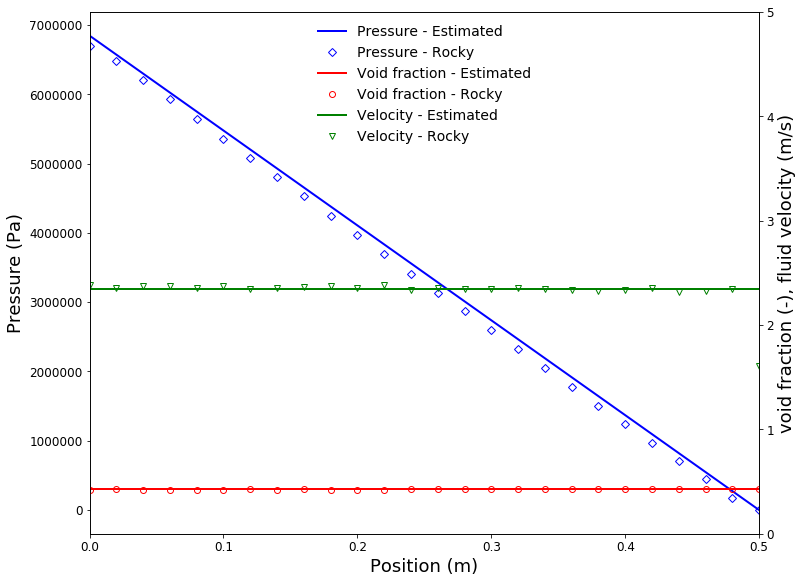

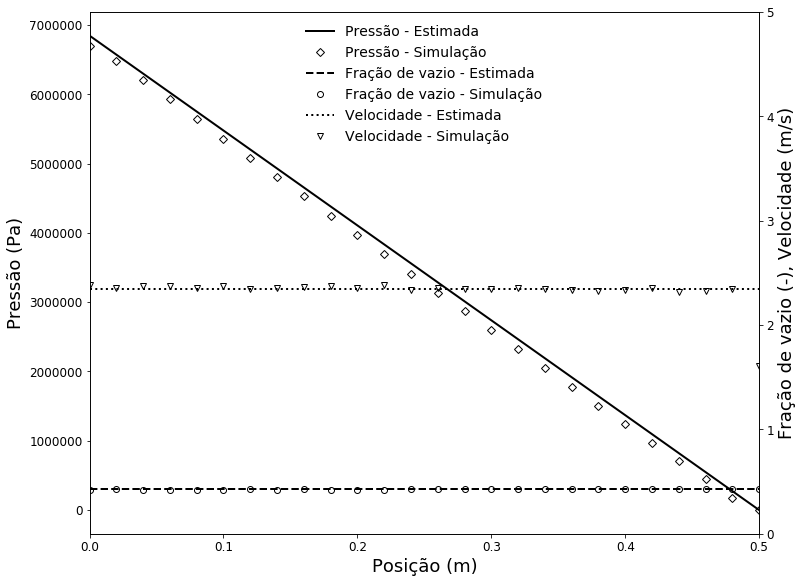

In [4]:

initial_pressure = (yfinal-yinit)*pressure_drop_Ergun(estimated_void_fraction, mu_f, superficial_velocity, d_p, rho_f)


# loading the digitized data
pressure_1d = open("pressure_1d.txt", 'r')
x, y, z, position_rocky, pressure_rocky = np.loadtxt(pressure_1d, delimiter = ',', skiprows = 1, unpack = True)    
pressure_1d.close()

pressure_rocky -= pressure_rocky[-1] 

# loading the digitized data
vel_1d = open("velocity_1d.txt", 'r')
x, y, z, position_rocky, velocityY = np.loadtxt(vel_1d, delimiter = ',', skiprows = 1, unpack = True)    
vel_1d.close()

# loading the digitized data
vf_1d = open("volume-fraction_1d.txt", 'r')
x, y, z, position_rocky, vf_rocky = np.loadtxt(vf_1d, delimiter = ',', skiprows = 1, unpack = True)    
vf_1d.close()

print(len(position_rocky))

steps = len(position_rocky)

void_fraction_array = np.zeros(steps)
pressure_array = np.zeros(steps)
real_velocity_array = np.zeros(steps)
y = np.linspace(0, 0.5, steps)

# calculating the values using Ergun
for index in range(len(y)):
    #void_fraction_array[index] = estimated_porosity(y[index], yinit, yfinal,  estimated_void_fraction)
    void_fraction_array[index] = estimated_void_fraction
    pressure_array[index] = (1.0 - y[index] / yfinal) * initial_pressure
    #pressure_array[index] = pressure_array[index-1]-(y[index]-y[index-1])*pressure_drop_Ergun(void_fraction_array[index], mu_f, superficial_velocity, d_p, rho_f)
    real_velocity_array[index] = superficial_velocity/void_fraction_array[index]
    

distance = position_rocky[-1]-position_rocky
   
# plotting
label_size = 12
plt.rcParams["figure.figsize"] = (12.0, 9.6)
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
ax1 = fig.add_subplot(111)
#s1 = ax1.plot(y,initial_pressure + pressure_array, linewidth = 2, color = "blue", label = "Pressure - Estimated")
s1 = ax1.plot(y,pressure_array, linewidth = 2, color = "blue", label = "Pressure - Estimated")
r1 = ax1.plot(position_rocky,pressure_rocky, linestyle = "None", marker = 'D', markeredgecolor = "blue",  markeredgewidth = 1.0, markevery=2, 
           markerfacecolor = "none", label = "Pressure - Rocky")
ax1.set_xlabel('Position (m)',  fontsize = 18)
ax1.set_xlim([0, 0.5])
#ax1.set_ylim([-1000, 30000])
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Pressure (Pa)',  fontsize = 18, color='black')

ax2 = ax1.twinx()
s2 = ax2.plot(y,void_fraction_array, linewidth = 2, color = "red", label = "Void fraction - Estimated")
s3 = ax2.plot(y,real_velocity_array, linewidth = 2, color = "green", label = "Velocity - Estimated")
r2 = ax2.plot(position_rocky,1-vf_rocky, linestyle = "None", color = "red", marker = 'o', markeredgecolor = "red",  markeredgewidth = 1.0, markevery=2, 
           markerfacecolor = "none", label = "Void fraction - Rocky")
r3 = ax2.plot(position_rocky,velocityY, linestyle = "None", color = "green", marker = 'v', markeredgecolor = "green",  markeredgewidth = 1.0, markevery=2, 
           markerfacecolor = "none", label = "Velocity - Rocky")
ax2.set_ylabel('void fraction (-), fluid velocity (m/s)', color='black',fontsize = 18)
ax2.set_xlim([0, 0.5])
ax2.set_ylim([0, 5])
plt.xticks(fontsize = 200) 
    
lns = s1+r1+s2+r2+s3+r3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', frameon = False, fontsize = 14)
#plt.savefig('fixedBedResultsenglish.png')  
plt.show()

# plotting

fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
#s1 = ax1.plot(y,initial_pressure + pressure_array, linewidth = 2, linestyle= '-', color = "black", label = "Pressão - Estimada")
s1 = ax1.plot(y,pressure_array, linewidth = 2, linestyle= '-', color = "black", label = "Pressão - Estimada")
r1 = ax1.plot(position_rocky,pressure_rocky, linestyle = "None", marker = 'D', markeredgecolor = "black",  markeredgewidth = 1.0, markevery=2, 
           markerfacecolor = "none", label = "Pressão - Simulação")
ax1.set_xlabel('Posição (m)',  fontsize = 18)
ax1.set_xlim([0, 0.5])
#ax1.set_ylim([-1000, 30000])
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Pressão (Pa)',  fontsize = 18, color='black')

ax2 = ax1.twinx()
s2 = ax2.plot(y,void_fraction_array, linewidth = 2, color = "black", linestyle= '--', label = "Fração de vazio - Estimada")
s3 = ax2.plot(y,real_velocity_array, linewidth = 2, color = "black", linestyle= ':', label = "Velocidade - Estimada")
r2 = ax2.plot(position_rocky,1-vf_rocky, linestyle = "None", color = "black", marker = 'o', markeredgecolor = "black",  markeredgewidth = 1.0, markevery=2, 
           markerfacecolor = "none", label = "Fração de vazio - Simulação")
r3 = ax2.plot(position_rocky,velocityY, linestyle= 'None', color = "black", marker = 'v', markeredgecolor = "black",  markeredgewidth = 1.0, markevery=2, 
           markerfacecolor = "none", label = "Velocidade - Simulação")
ax2.set_ylabel('Fração de vazio (-), Velocidade (m/s)', color='black',fontsize = 18)
ax2.set_xlim([0, 0.5])
ax2.set_ylim([0, 5])
plt.xticks(fontsize = 200) 
    
lns = s1+r1+s2+r2+s3+r3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', frameon = False, fontsize = 14)
plt.savefig('fixed1dBedResults.png')  
plt.show()



In [5]:
print(len(pressure_rocky))
print(len(position_rocky))
print(pressure_rocky[-1])
print(position_rocky[-1])

51
51
0.0
0.5


 
-1.369e+07 x + 6.724e+06
-13690796.5276
13693214.453542644
-13690796.5276
0.017657840305


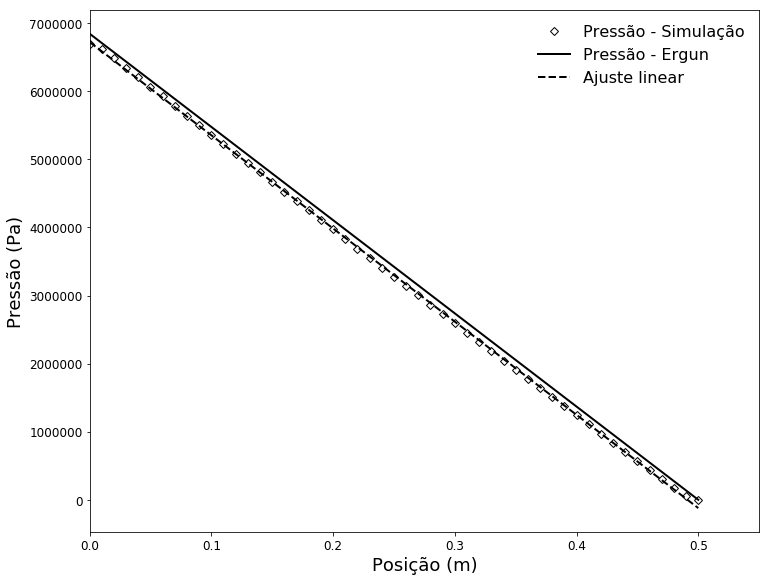

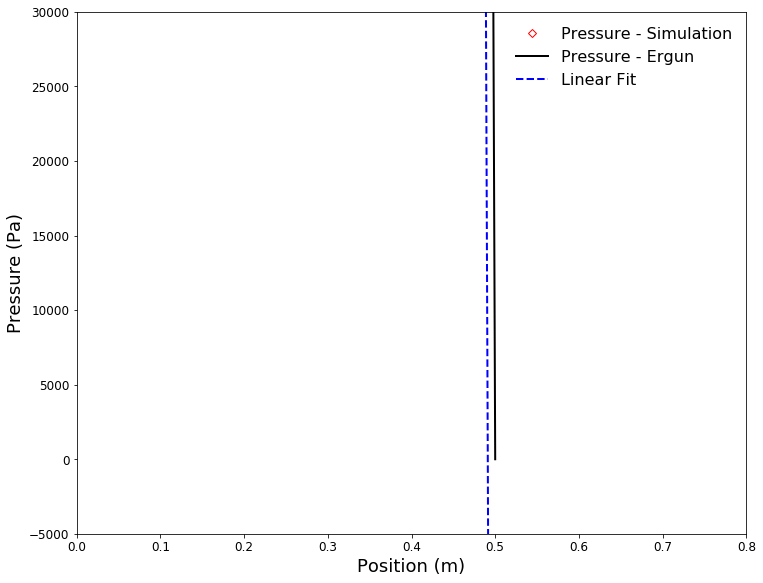

In [6]:
#fazendo o ajuste linear da pressao versus posicao
fit = np.polyfit(position_rocky,pressure_rocky,1)

#recuperando a regressao linear
fit_fn = np.poly1d(fit) 
print(fit_fn)
print(fit_fn[1])
pressure_drop_linear = fit_fn[1]
pressure_drop_meter_ergun = pressure_drop_Ergun(estimated_void_fraction, mu_f, superficial_velocity, d_p, rho_f)

#calculando o erro entre o previsto por Ergun e o previsto pela simulação
error = np.absolute(100*(pressure_drop_meter_ergun+fit_fn[1])/pressure_drop_meter_ergun)
print(pressure_drop_meter_ergun)
print(pressure_drop_linear)
print(error)

plt.plot(position_rocky, pressure_rocky, linestyle = "None", marker = 'D', markeredgecolor = "black",  markeredgewidth = 1.0, markevery=1, 
           markerfacecolor = "none", label = "Pressão - Simulação")
plt.plot(y,pressure_array, linewidth = 2, linestyle= '-', color = "black", label = "Pressão - Ergun")
plt.plot(position_rocky,fit_fn(position_rocky), linewidth = 2, linestyle= '--', color = "black", label = "Ajuste linear")
plt.xlabel('Posição (m)',  fontsize = 18)
plt.ylabel('Pressão (Pa)',  fontsize = 18)
plt.xlim(xmax = 0.55, xmin = 0.0)
#plt.ylim(ymin = 0.0)
plt.legend(fontsize = 16, loc='upper right', frameon = False)
plt.savefig('caso_linear_fit.png')  
plt.show()

plt.plot(position_rocky, pressure_rocky, linestyle = "None", marker = 'D', markeredgecolor = "red",  markeredgewidth = 1.0, markevery=3, 
           markerfacecolor = "none", label = "Pressure - Simulation")
plt.plot(y,pressure_array, linewidth = 2, linestyle= '-', color = "black", label = "Pressure - Ergun")
plt.plot(position_rocky,fit_fn(position_rocky), linewidth = 2, linestyle= '--', color = "blue", label = "Linear Fit")
plt.xlabel('Position (m)',  fontsize = 18)
plt.ylabel('Pressure (Pa)',  fontsize = 18)
plt.xlim(xmax = 0.8, xmin = 0.0)
plt.ylim(ymax = 30000, ymin = -5000)
plt.legend(fontsize = 16, loc='upper right', frameon = False)
#plt.savefig('caso3_linear_fit_english.png')  
plt.show()

In [22]:
pressure_rocky[-1]

11593.5